/var/folders/sq/5hx5g7bn3zv9rjzqdvz7n9f80000gn/T/ipykernel_31766/3460692627.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(combined_df['model'].unique()))


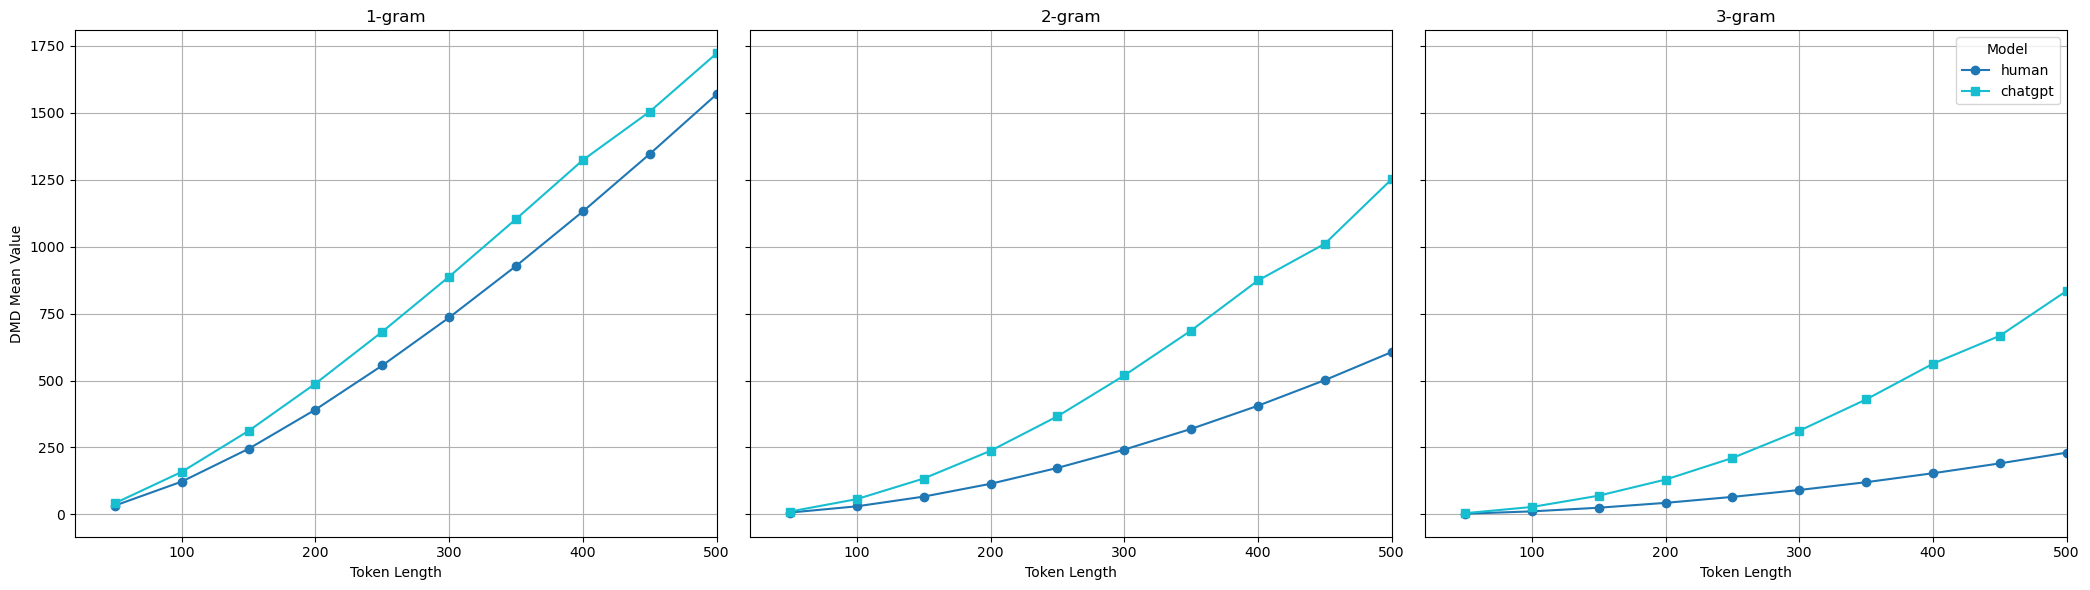

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import glob

# 读取所有 CSV 文件并合并为一个 DataFrame
combined_df = pd.read_csv('./HC3_reddit_all.csv')

# 将 dmd_sequence 列转换为实际的数值列表
combined_df['dmd_sequence'] = combined_df['dmd_sequence'].apply(ast.literal_eval)

# 计算每个模型和窗口大小的 dmd 平均值
combined_df['dmd_mean'] = combined_df['dmd_sequence'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

# 确保 gram 的顺序是从 1 到 3
grams = sorted(combined_df['gram'].unique())

# 定义不同的颜色和标记
colors = plt.cm.get_cmap('tab10', len(combined_df['model'].unique()))
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', 'H', '*', 'X', 'd']

# 创建包含多个子图的图形
fig, axs = plt.subplots(1, len(grams), figsize=(21, 6), sharey=True)  # 增加宽度以扩大每个子图

# 遍历每个 gram 值并绘制折线图到各个子图中
for i, gram in enumerate(grams):
    ax = axs[i]
    gram_data = combined_df[combined_df['gram'] == gram]
    models = gram_data['model'].unique()
    
    for j, model in enumerate(models):
        model_data = gram_data[gram_data['model'] == model]
        window_sizes = sorted(model_data['window_size'].unique())
        
        # 过滤掉 DMD 等于 0 之后的所有窗口大小
        filtered_window_sizes = []
        filtered_means = []
        for ws in window_sizes:
            mean_value = model_data[model_data['window_size'] == ws]['dmd_mean'].values[0]
            if mean_value == 0:
                break
            filtered_window_sizes.append(ws)
            filtered_means.append(mean_value)
        
        ax.plot(filtered_window_sizes, filtered_means, label=model, color=colors(j), marker=markers[j % len(markers)])
    
    # 设置子图标题和 x 轴标签
    ax.set_title(f'{gram}-gram')
    ax.set_xlabel('Token Length')
    ax.set_xlim(20, max(window_sizes))  # x 轴从 20 开始
    
    # 添加网格
    ax.grid(True)

# 设置 y 轴标签（共享）
axs[0].set_ylabel('DMD Mean Value')

# 在最后一个子图中设置图例
axs[-1].legend(title='Model')

# 调整子图之间的间距
plt.tight_layout()

# 保存图形
plt.savefig('dmd_mean_ngrams_plot.png')

# 显示图形
plt.show()
